In [34]:

#Normalise time series data
from sklearn.preprocessing import MinMaxScaler

#Get Data
from pandas_datareader import DataReader # pip install pandas-datareader
from pandas_datareader import data
from datetime import datetime

import pandas as pd
import plotly as ply
 
start = pd.to_datetime('2010-01-01') # in YYYY-MM-DD format
end = pd.to_datetime('today')
ts = data.DataReader('NDAQ', 'yahoo', start , end) # here 'yahoo' is the API to yahoo

<AxesSubplot:title={'center':'NDAQ 2010-2021'}, xlabel='Date'>

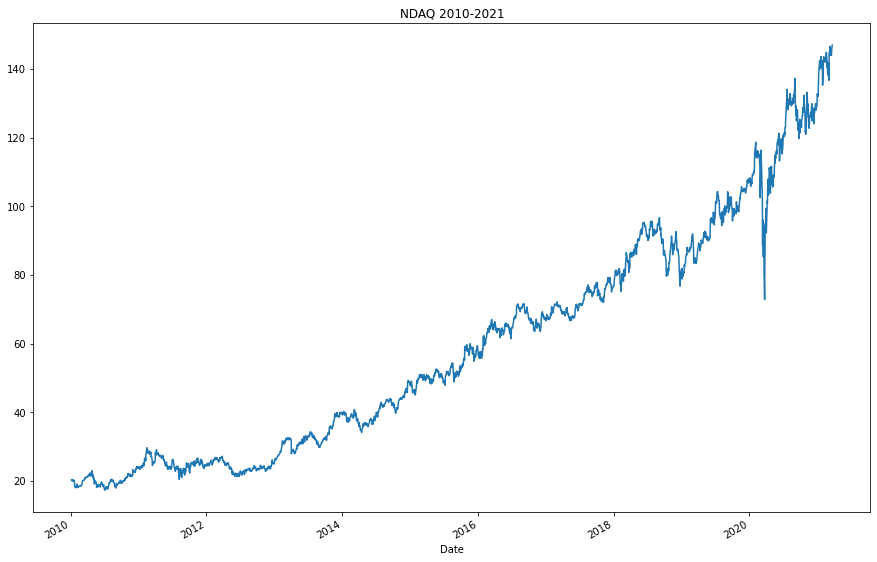

In [35]:
ts.Close.plot(figsize=(15,10), title = "NDAQ 2010-2021")
#PLAIN DATA

In [36]:
print(ts.head)

<bound method NDFrame.head of                   High         Low        Open       Close     Volume  \
Date                                                                    
2010-01-04   20.430000   19.900000   19.920000   20.240000  2171500.0   
2010-01-05   20.320000   19.930000   19.930000   20.299999  1481700.0   
2010-01-06   20.360001   20.160000   20.200001   20.290001  2446700.0   
2010-01-07   20.299999   19.889999   20.250000   20.020000  2832800.0   
2010-01-08   20.299999   19.879999   20.030001   20.230000  1449200.0   
...                ...         ...         ...         ...        ...   
2021-03-16  147.080002  144.479996  146.059998  145.470001   899000.0   
2021-03-17  145.770004  142.350006  144.960007  144.020004  1683500.0   
2021-03-18  145.889999  142.869995  144.059998  144.940002  1821900.0   
2021-03-19  146.830002  143.789993  145.000000  145.740005  2189700.0   
2021-03-22  148.190002  144.759995  145.740005  147.000000   300710.0   

             Adj Clo

In [37]:
#Change table to only have closing values

ts = data.DataReader('NDAQ', 'yahoo', start , end) # here 'yahoo' is the API to yahoo
ts = ts['Adj Close']
print(ts)

Date
2010-01-04     17.347511
2010-01-05     17.398933
2010-01-06     17.390356
2010-01-07     17.158953
2010-01-08     17.338934
                 ...    
2021-03-16    145.470001
2021-03-17    144.020004
2021-03-18    144.940002
2021-03-19    145.740005
2021-03-22    147.000000
Name: Adj Close, Length: 2823, dtype: float64


In [38]:
#Prepare data for normalization
values = ts.values
values = values.reshape((len(values), 1))

In [39]:
#Train the normalization
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

Min: 14.827660, Max: 147.000000


In [40]:
# normalize the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])

[0.01906489]
[0.01945395]
[0.01938905]
[0.01763828]
[0.019]


In [41]:
#inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
      print(inversed[i])  

[17.34751129]
[17.39893341]
[17.39035606]
[17.15895271]
[17.33893394]


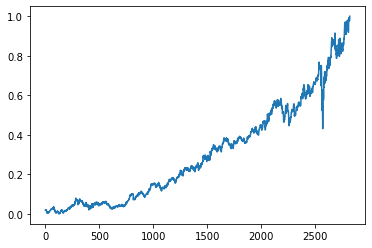

In [42]:
#Plotting the normalized dataset
import matplotlib.pyplot as plt
plt.plot(normalized)

<AxesSubplot:>

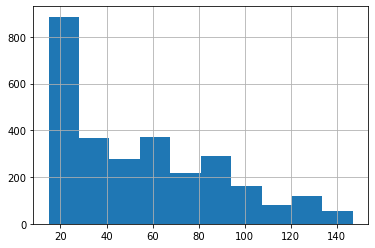

In [43]:
ts.hist()

<AxesSubplot:ylabel='Frequency'>

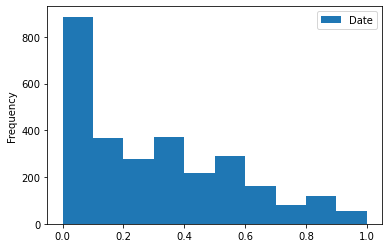

In [44]:
df = pd.DataFrame(normalized, columns=['Date'])

df.plot.hist(by=None, bins=10)

In [45]:
# STANDARDIZING THE DATA

In [46]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

# prepare data for standardization
values = ts.values
values = values.reshape((len(values), 1))

In [47]:
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

Mean: 55.300230, StandardDeviation: 33.989341


In [48]:
# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])

[-1.11660649]
[-1.1150936]
[-1.11534596]
[-1.12215407]
[-1.11685884]


In [49]:
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

[17.34751129]
[17.39893341]
[17.39035606]
[17.15895271]
[17.33893394]


In [52]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf